Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Tasks:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data=pd.read_csv("ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [10]:
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset.# Pre-process the data to apply the MLR.
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# converting "Fuel_type" which is having categical data into numerical form 
label_encode=LabelEncoder()

In [18]:
data['Fuel_Type']=label_encode.fit_transform(data['Fuel_Type'])

In [19]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


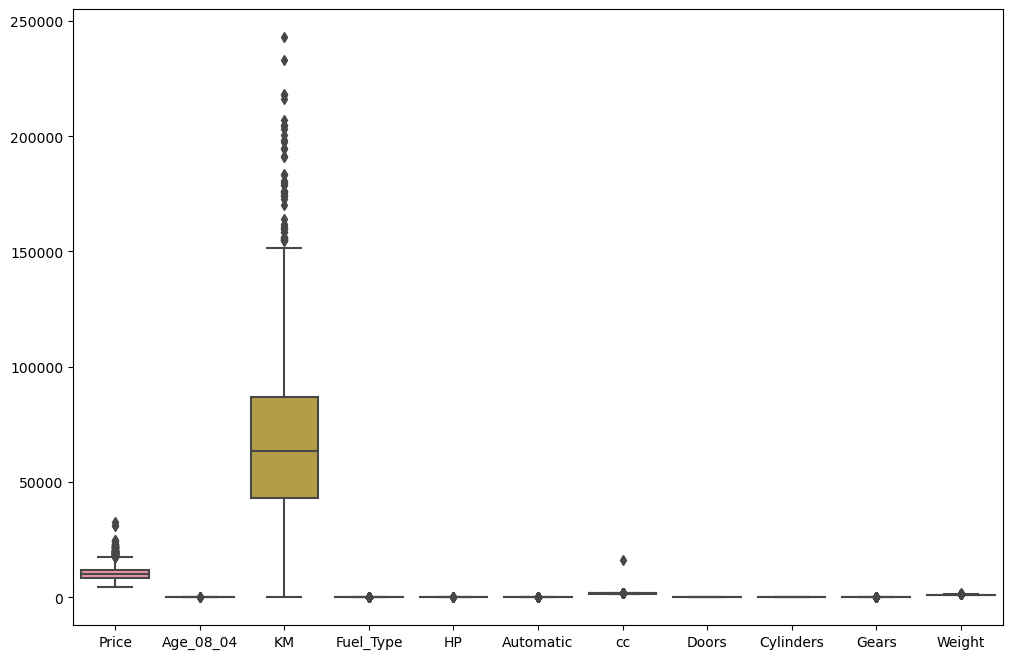

In [20]:
#identify the outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.show()

In [21]:
# calculating the outliers
Q1=data.quantile(0.25)
Q1

Price         8450.0
Age_08_04       44.0
KM           43000.0
Fuel_Type        2.0
HP              90.0
Automatic        0.0
cc            1400.0
Doors            3.0
Cylinders        4.0
Gears            5.0
Weight        1040.0
Name: 0.25, dtype: float64

In [22]:
Q3=data.quantile(0.75)
Q3

Price        11950.0
Age_08_04       70.0
KM           87041.5
Fuel_Type        2.0
HP             110.0
Automatic        0.0
cc            1600.0
Doors            5.0
Cylinders        4.0
Gears            5.0
Weight        1085.0
Name: 0.75, dtype: float64

In [23]:
IQR=Q3-Q1
IQR

Price         3500.0
Age_08_04       26.0
KM           44041.5
Fuel_Type        0.0
HP              20.0
Automatic        0.0
cc             200.0
Doors            2.0
Cylinders        0.0
Gears            0.0
Weight          45.0
dtype: float64

In [24]:
U_E=Q3+1.5*IQR
U_E

Price         17200.00
Age_08_04       109.00
KM           153103.75
Fuel_Type         2.00
HP              140.00
Automatic         0.00
cc             1900.00
Doors             8.00
Cylinders         4.00
Gears             5.00
Weight         1152.50
dtype: float64

In [25]:
L_E=Q1-1.5*IQR
L_E

Price         3200.00
Age_08_04        5.00
KM          -23062.25
Fuel_Type        2.00
HP              60.00
Automatic        0.00
cc            1100.00
Doors            0.00
Cylinders        4.00
Gears            5.00
Weight         972.50
dtype: float64

In [26]:
Outliers=(data>U_E)| (data<L_E)
Outliers.sum()

Price        109
Age_08_04      7
KM            49
Fuel_Type    171
HP            11
Automatic     80
cc           122
Doors          0
Cylinders      0
Gears         46
Weight        65
dtype: int64

In [29]:
#remove the outliers
cleaned_data=data[~Outliers]
cleaned_data.dropna(inplace=True)

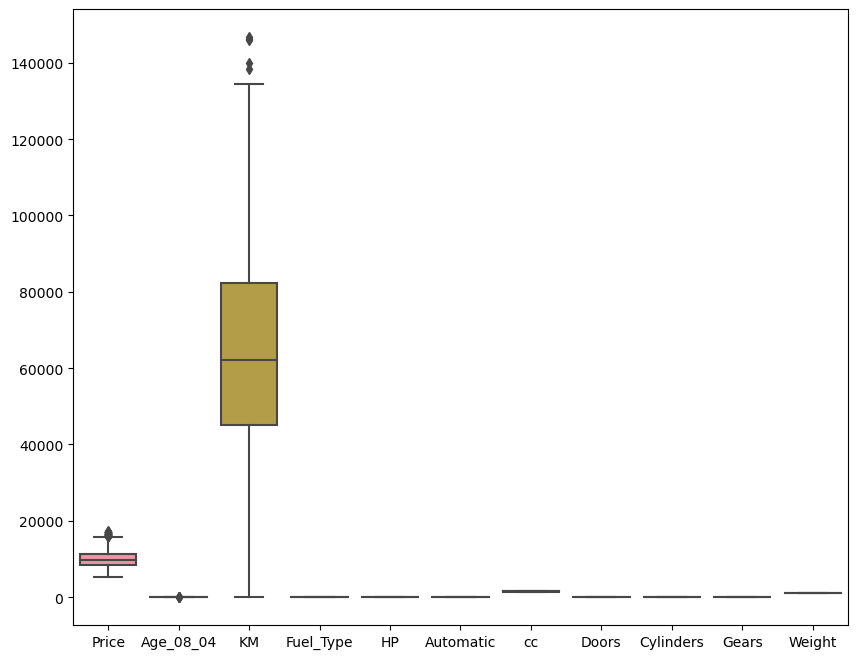

In [30]:
# plotting the no_outliers data
plt.figure(figsize=(10,8))
sns.boxplot(data=cleaned_data)
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
linear_model=LinearRegression()

In [34]:
#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
from sklearn.model_selection import train_test_split

In [40]:
# Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.


In [41]:
# Model-1:- Using all available predictor variables
features=data.drop('Price',axis=1)
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,4,5,1025
1432,72,19000,2,86,0,1300,3,4,5,1015
1433,71,17016,2,86,0,1300,3,4,5,1015
1434,70,16916,2,86,0,1300,3,4,5,1015


In [42]:
target=data[["Price"]]
target

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [43]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(1148, 10)
(287, 10)
(1148, 1)
(287, 1)


In [45]:
#create a Linear Regression object
model1=LinearRegression()

In [46]:
#fit the trainingmodel 
model1.fit(x_train,y_train)

LinearRegression()

In [47]:
#predict the target variable from test set
y_pred1=model1.predict(x_test)

Text(0.5, 1.0, 'Model1')

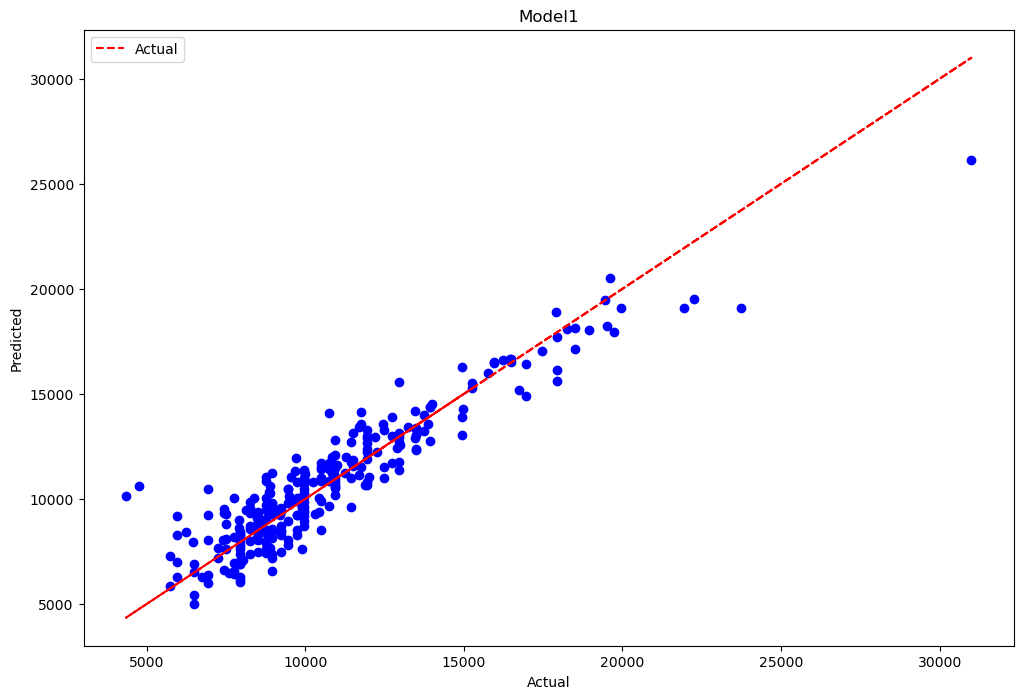

In [53]:
#Plot to see the performance of the model1
plt.figure(figsize=(12,8))
plt.scatter(y_test,y_pred1,color="blue")
plt.plot(y_test,y_test,linestyle='--', color='red', label='Actual')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title("Model1")

In [54]:
# Model-2:- Using subsets of available predictor variables ex:- taking any two features 
features_subsets=data[["Age_08_04","KM"]]
features_subsets

,Age_08_04,KM
0,23,46986
1,23,72937
2,24,41711
3,26,48000
4,30,38500
...,...,...
1431,69,20544
1432,72,19000
1433,71,17016
1434,70,16916


In [55]:
x_train_subsets,x_test_subsets,y_train_subsets,y_test_subsets=train_test_split(features_subsets,target,train_size=0.8,random_state=100)

In [56]:
print(x_train_subsets.shape)
print(x_test_subsets.shape)
print(y_train_subsets.shape)
print(y_test_subsets.shape)

(1148, 2)
(287, 2)
(1148, 1)
(287, 1)


In [57]:
model2=LinearRegression()

In [58]:
model2.fit(x_train_subsets,y_train_subsets)

LinearRegression()

In [59]:
y_pred2=model2.predict(x_test_subsets)

Text(0.5, 1.0, 'Model2')

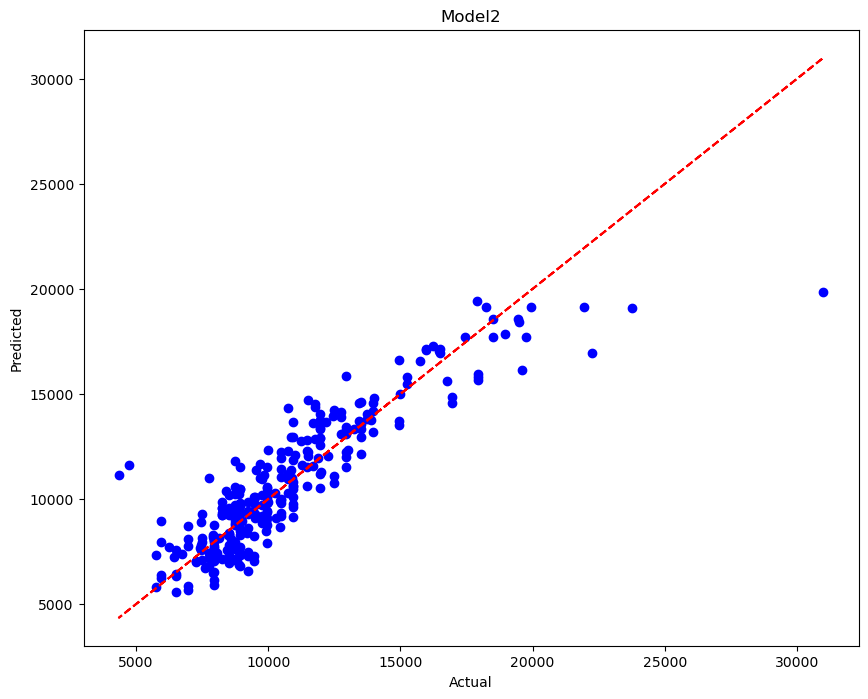

In [60]:
#plot to see the performance of model2
plt.figure(figsize=(10,8))
plt.scatter(y_test_subsets,y_pred2,color="blue")
plt.plot(y_test_subsets,y_test_subsets,linestyle="--",color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model2")

In [61]:
#model3 Using model with polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)

In [62]:
#Generate polynomial features 
x_poly=poly.fit_transform(features)
x_poly

array([[1.000000e+00, 2.300000e+01, 4.698600e+04, ..., 2.500000e+01,
        5.825000e+03, 1.357225e+06],
       [1.000000e+00, 2.300000e+01, 7.293700e+04, ..., 2.500000e+01,
        5.825000e+03, 1.357225e+06],
       [1.000000e+00, 2.400000e+01, 4.171100e+04, ..., 2.500000e+01,
        5.825000e+03, 1.357225e+06],
       ...,
       [1.000000e+00, 7.100000e+01, 1.701600e+04, ..., 2.500000e+01,
        5.075000e+03, 1.030225e+06],
       [1.000000e+00, 7.000000e+01, 1.691600e+04, ..., 2.500000e+01,
        5.075000e+03, 1.030225e+06],
       [1.000000e+00, 7.600000e+01, 1.000000e+00, ..., 2.500000e+01,
        5.570000e+03, 1.240996e+06]])

In [63]:
#split & train the model3
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,target,train_size=0.8,random_state=100)
print(x_train_poly.shape)
print(x_test_poly.shape)
print(y_train_poly.shape)
print(y_test_poly.shape)

(1148, 66)
(287, 66)
(1148, 1)
(287, 1)


In [64]:
#create the model3
model3= LinearRegression()

In [65]:
#fit the model3
model3.fit(x_train_poly,y_train_poly)

LinearRegression()

In [66]:
ypred3=model3.predict(x_test_poly)

Text(0.5, 1.0, 'Model3')

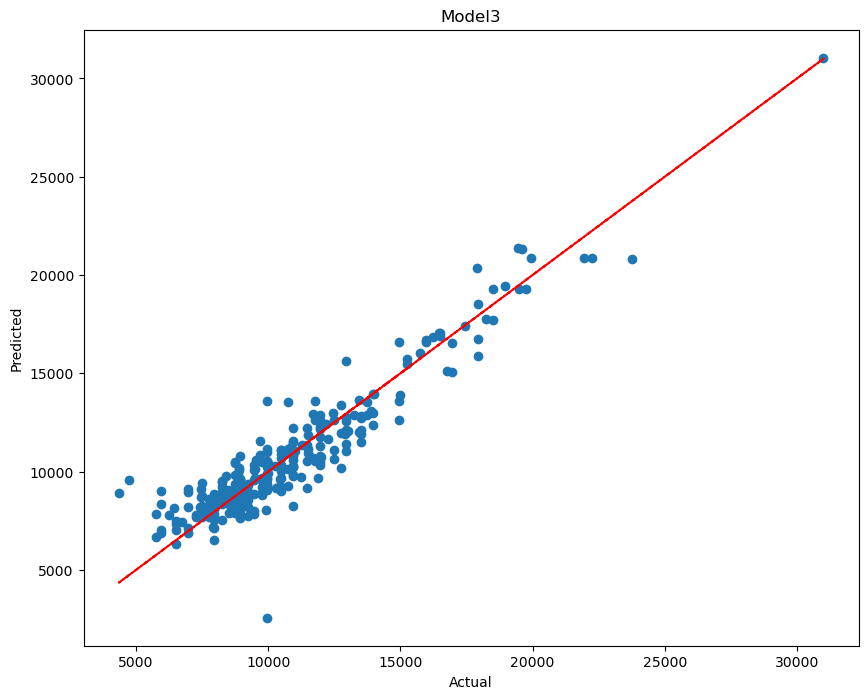

In [70]:
#plot the model3
plt.figure(figsize=(10,8))
plt.scatter(y_test_poly,ypred3)
plt.plot(y_test_poly,y_test_poly,linestyle="--",color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Model3")

In [72]:
# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
from sklearn.metrics import mean_squared_error,r2_score
MSE_1=mean_squared_error(y_test,y_pred1)
print("Model 1 Mean Squared Error:", MSE_1)
r2_model1=r2_score(y_test,y_pred1)
print("R-squared for Model 1:", r2_model1)

Model 1 Mean Squared Error: 1585354.416824982
R-squared for Model 1: 0.8671580177926694


In [73]:
MSE_2=mean_squared_error(y_test_subsets,y_pred2)
print("Model 2 Mean Squared Error:", MSE_2)
r2_model2=r2_score(y_test,y_pred1)
print("R-squared for Model 2:", r2_model2)

Model 2 Mean Squared Error: 2421438.5181178865
R-squared for Model 2: 0.8671580177926694


In [74]:
MSE_3=mean_squared_error(y_test,ypred3)
print("Model 3 Mean Squared Error:", MSE_3)
r2_model3=r2_score(y_test,y_pred1)
print("R-squared for Model 3:", r2_model2)

Model 3 Mean Squared Error: 1394672.7576300455
R-squared for Model 3: 0.8671580177926694


In [75]:
#Apply Lasso and Ridge methods on the model.
from sklearn.linear_model import Lasso,Ridge

In [76]:
#create the object for Lasso 
lasso=Lasso(alpha=1.0)

In [77]:
#fit the model1 for lasso
lasso.fit(x_train,y_train)

Lasso()

In [78]:
# predict the model 
y_pred_lasso=lasso.predict(x_test)

In [79]:
#evaluate the MSE 
MSE_lasso=mean_squared_error(y_test,y_pred_lasso)
print(MSE_lasso)
r2_lasso=r2_score(y_test,y_pred1)
print("R-squared for lasso:", r2_lasso)

1584947.2410637294
R-squared for lasso: 0.8671580177926694


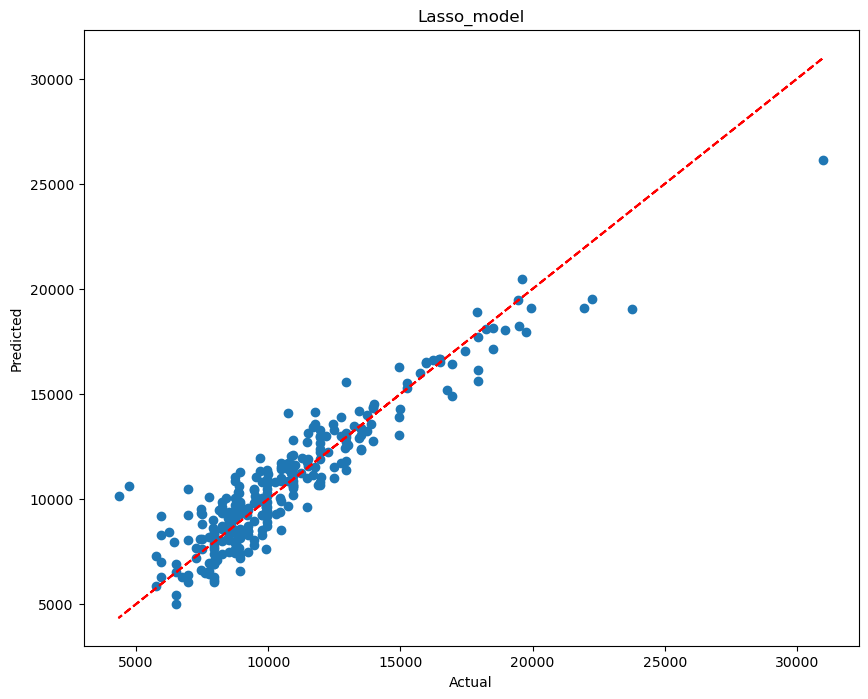

In [80]:
#plot the lasso model
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_lasso)
plt.plot(y_test,y_test,linestyle="--",color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso_model")
plt.show()

In [81]:
# create ridge model
ridge=Ridge(alpha=1.0)

In [82]:
# fit the model
ridge.fit(x_train,y_train)

Ridge()

In [83]:
# predict the model 
y_pred_ridge=ridge.predict(x_test)

In [84]:
# evaluate the MSE for ridge 
MSE_ridge=mean_squared_error(y_test,y_pred_ridge)
print(MSE_ridge)
r2_ridge=r2_score(y_test,y_pred1)
print("R-squared for ridge:", r2_ridge)

1585026.5821864323
R-squared for ridge: 0.8671580177926694


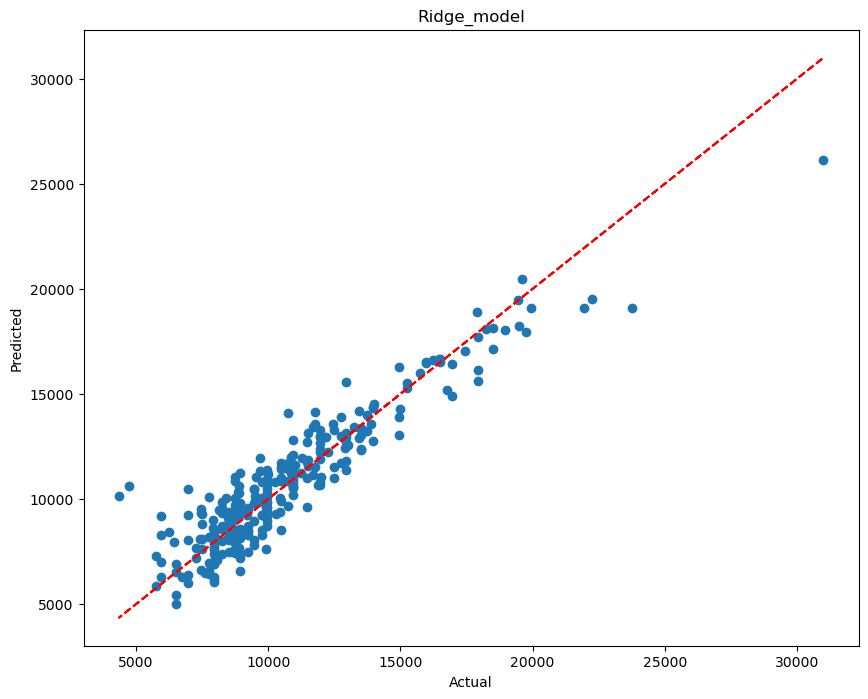

In [85]:
#plot the ridge model
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_ridge)
plt.plot(y_test,y_test,linestyle="--",color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge_model")
plt.show()